In [1]:
print("hello world!")

hello world!


# How does sulphate and chlorides interact
In electrolytes containing both sulphate and chloride ions, the sulphate ion favours the formation of lead sulphate which is rapidly transformed to lead dioxide. The continuing satisfactory operation of the anode depends upon the initial conditions of polarisation.

# Does wine affects electrolytes

wine can affect electrolytes as alcohol dehydrates the body, leading to an imbalance in electrolytes like sodium, potassium, and magnesium. Excessive consumption of wine can disrupt the body’s electrolyte balance, which is important for proper nerve and muscle function.

# Electrolyte-Infused Wine Trends

As consumers become more health-conscious, the demand for electrolyte-infused beverages extends into the world of wine. Electrolyte-infused wines are a growing trend that offers a unique twist on traditional wine consumption. By adding electrolytes such as potassium, sodium, and magnesium to wine, producers aim to provide a hydrating and refreshing alternative to regular wine.

[full article]("https://flavorycooking.com/does-wine-affect-electrolytes/");

// NOTE : excessive alcohol consumption can lead to a heart disease, especially for this kind of products.


In [2]:
import matplotlib.pyplot as pyplot
import pandas as pd
import numpy as np



In [3]:
wine_quality = pd.read_csv("./venv/data/winequality-white.csv", sep=";")

In [4]:
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
X = wine_quality.drop("quality", axis=1)

Y = wine_quality["quality"]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [7]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((3673, 11), (1225, 11), (3673,), (1225,))

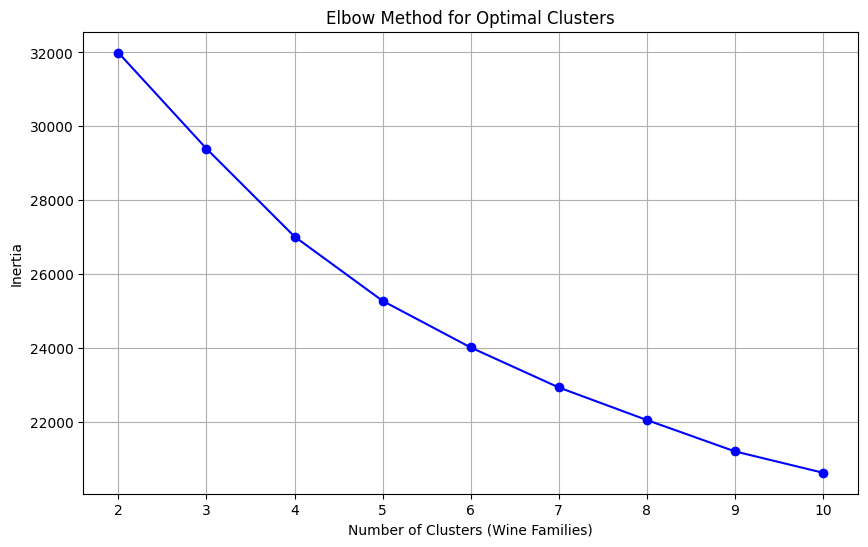

In [8]:
# Clustering initiation

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Scale the features for clustering
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Find optimal number of clusters using elbow method
inertias = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
pyplot.figure(figsize=(10, 6))
pyplot.plot(K_range, inertias, 'bo-')
pyplot.xlabel('Number of Clusters (Wine Families)')
pyplot.ylabel('Inertia')
pyplot.title('Elbow Method for Optimal Clusters')
pyplot.grid(True)
pyplot.show()


Wine Family Analysis:

Wine Family 1:
  Number of wines: 349
  Average quality: 5.24
  Quality range: 3 - 8
  Average alcohol: 9.85%
  Average acidity: 6.76
  Average sulphates: 0.46

Wine Family 2:
  Number of wines: 735
  Average quality: 6.46
  Quality range: 3 - 9
  Average alcohol: 12.10%
  Average acidity: 6.25
  Average sulphates: 0.46

Wine Family 3:
  Number of wines: 1032
  Average quality: 5.62
  Quality range: 3 - 8
  Average alcohol: 9.42%
  Average acidity: 7.00
  Average sulphates: 0.49

Wine Family 4:
  Number of wines: 714
  Average quality: 5.98
  Quality range: 3 - 8
  Average alcohol: 10.40%
  Average acidity: 6.48
  Average sulphates: 0.56

Wine Family 5:
  Number of wines: 81
  Average quality: 5.54
  Quality range: 3 - 8
  Average alcohol: 9.61%
  Average acidity: 6.70
  Average sulphates: 0.46

Wine Family 6:
  Number of wines: 762
  Average quality: 5.85
  Quality range: 3 - 9
  Average alcohol: 10.94%
  Average acidity: 7.67
  Average sulphates: 0.46


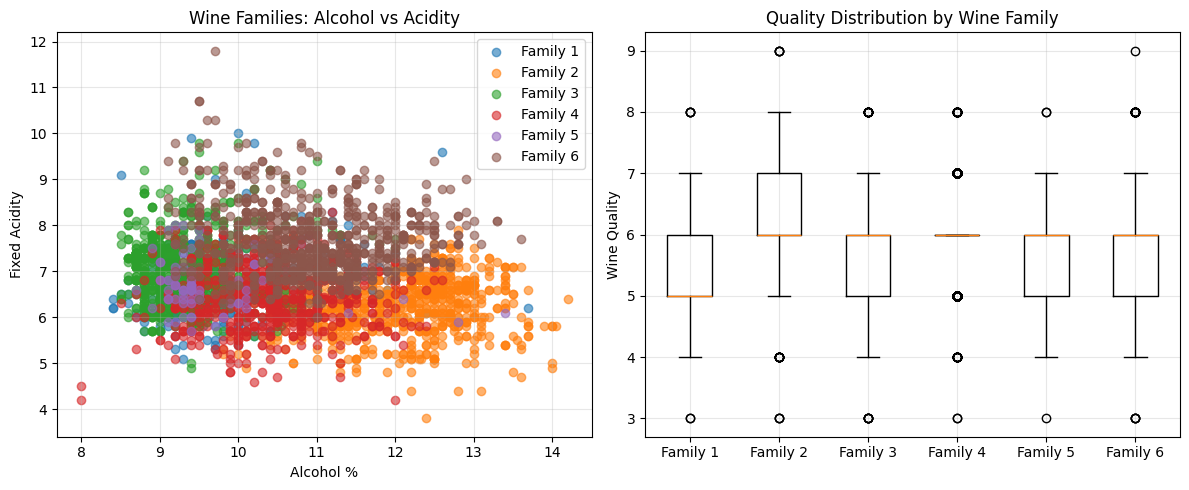

In [10]:
# Classification into wine families
# Based on the elbow curve, let's use 6 clusters for wine families -
optimal_k = 6 # 6 families
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_train_scaled)

# Add cluster assignments to training data
X_train_clustered = X_train.copy()
X_train_clustered['Cluster'] = cluster_labels

# Analyze characteristics of each wine family
print("Wine Family Analysis:")
print("=" * 60)
for cluster in range(optimal_k):
    cluster_data = X_train_clustered[X_train_clustered['Cluster'] == cluster]
    quality_scores = Y_train[cluster_data.index]
    
    print(f"\nWine Family {cluster + 1}:")
    print(f"  Number of wines: {len(cluster_data)}")
    print(f"  Average quality: {quality_scores.mean():.2f}")
    print(f"  Quality range: {quality_scores.min():.0f} - {quality_scores.max():.0f}")
    print(f"  Average alcohol: {cluster_data['alcohol'].mean():.2f}%")
    print(f"  Average acidity: {cluster_data['fixed acidity'].mean():.2f}")
    print(f"  Average sulphates: {cluster_data['sulphates'].mean():.2f}")

# Visualize clusters (using 2D projection with key features)
pyplot.figure(figsize=(12, 5))

# Plot 1: Alcohol vs Fixed Acidity
pyplot.subplot(1, 2, 1)
for cluster in range(optimal_k):
    mask = cluster_labels == cluster
    pyplot.scatter(X_train_clustered[mask]['alcohol'], 
                   X_train_clustered[mask]['fixed acidity'], 
                   label=f'Family {cluster + 1}', alpha=0.6)
pyplot.xlabel('Alcohol %')
pyplot.ylabel('Fixed Acidity')
pyplot.title('Wine Families: Alcohol vs Acidity')
pyplot.legend()
pyplot.grid(True, alpha=0.3)

# Plot 2: Quality vs Cluster
pyplot.subplot(1, 2, 2)
quality_by_cluster = [Y_train[X_train_clustered['Cluster'] == i].values for i in range(optimal_k)]
pyplot.boxplot(quality_by_cluster, tick_labels=[f'Family {i+1}' for i in range(optimal_k)])
pyplot.ylabel('Wine Quality')
pyplot.title('Quality Distribution by Wine Family')
pyplot.grid(True, alpha=0.3)

pyplot.tight_layout()
pyplot.show()


# Observations

We can see here a regression line (diagonal line) between alcohol/fixed_acidity.
For families 1 and 3 we have the best quality range.
While family 3 is having an upper average quality, we can conclude that sacrifying acidity against alcohol is acceptable.



# Objective

Introducing new factors to the game, particularly minerals (magnesium, potassium), in order to create a wine formula that reduces the alcohol consumption of our minerals and give it a fresh feeling, while keeping the wine tasters enjoy a premium quality.

# Considerations

  ## Technical considerations

    In modeling terms:

      - Alcohol is exogenous

      - Acidity, pH, sulphates are structural

      - Quality is a function of balance under constraint
 
  ## Verdict
    
    